In [1]:
import numpy as np
import matplotlib
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
import joblib
from sklearn.svm import SVR

In [2]:
fueldata=pd.read_csv('PWR_UOX-MOX_BigDataFrame-SF-GSRC.csv')
for columna in ["Unnamed: 0","reactorType"]:
    fueldata= fueldata.loc[:, fueldata.columns != columna] 


In [3]:
from sklearn.preprocessing import StandardScaler
X=fueldata
Y=fueldata[['BU', 'CT', 'IE','fuelType']]
#del fueldata
for columna in ['BU', 'CT', 'IE','fuelType']:
    X= X.loc[:, X.columns != columna]

X_s = StandardScaler()
X_escalada=  X_s.fit_transform(X.values)
Pandas_Xescalada = pd.DataFrame(data=X_escalada, columns = X.columns)

In [4]:
#modelo 1
#joblib.dump(X_escalada,'escaler.modelos') 

In [5]:
X.iloc[320].to_excel("herramienta/ejemplo.xlsx")

ModuleNotFoundError: No module named 'openpyxl'

In [6]:
SVR_BU= SVR(C=100,epsilon=0.1,kernel="linear",max_iter = 1000)
SVR_IE= SVR(C=100,epsilon=0.1,kernel="linear",max_iter = 1000)
SVR_CT= SVR(C=40,epsilon=0.5,kernel="linear",max_iter = 1000)

In [7]:
_conjunto_de_train_X,_conjunto_de_test_X,_conjunto_de_train_Y,_conjunto_de_test_Y=train_test_split(Pandas_Xescalada,Y,test_size=0.2,random_state=128)#conjunto_X_de20000,conjunto_Y_de20000
print(_conjunto_de_train_X.shape,_conjunto_de_test_X.shape)
print(_conjunto_de_train_Y.shape,_conjunto_de_test_Y.shape)

(1057117, 283) (264280, 283)
(1057117, 4) (264280, 4)


In [8]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import r2_score
from joblib import dump
fold= KFold(n_splits=5, shuffle=True, random_state=127)
scores = pd.DataFrame(data=[["SVR",0,0.0,"lineal",0.0,0.0,0.0,0.0,0.0]], columns=["MODEL","C","Epsilon","Kernel","R2_fold1","R2_fold2","R2_fold3","R2_fold4","R2_fold5"])
for train_index, test_index in fold.split(_conjunto_de_train_X,_conjunto_de_train_Y):
    X_train = _conjunto_de_train_X.iloc[train_index].values
    X_test =  _conjunto_de_train_X.iloc[test_index].values
    SVR_BU.fit(X_train,_conjunto_de_train_Y["BU"].iloc[train_index].values)
    SVR_IE.fit(X_train,_conjunto_de_train_Y["IE"].iloc[train_index].values)
    SVR_CT.fit(X_train,_conjunto_de_train_Y["CT"].iloc[train_index].values)

c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your d

In [9]:
"""
SVR_BU.fit(_conjunto_de_train_X,_conjunto_de_train_Y["BU"].values)
SVR_IE.fit(_conjunto_de_train_X,_conjunto_de_train_Y["IE"].values)
SVR_CT.fit(_conjunto_de_train_X,_conjunto_de_train_Y["CT"].values)
"""

'\nSVR_BU.fit(_conjunto_de_train_X,_conjunto_de_train_Y["BU"].values)\nSVR_IE.fit(_conjunto_de_train_X,_conjunto_de_train_Y["IE"].values)\nSVR_CT.fit(_conjunto_de_train_X,_conjunto_de_train_Y["CT"].values)\n'

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_train = []
print(datetime.now())
predict_BU = SVR_BU.predict(_conjunto_de_train_X.values)
predict_IE = SVR_IE.predict(_conjunto_de_train_X.values)
predict_CT = SVR_CT.predict(_conjunto_de_train_X.values)
print(datetime.now())
metrica_train.append(["BU","R2",r2_score(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","R2",r2_score(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","R2",r2_score(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MSE",mean_squared_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MSE",mean_squared_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","MSE",mean_squared_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MAE",median_absolute_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MAE",median_absolute_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","MAE",median_absolute_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MaxE",max_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MaxE",max_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","MaxE",max_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())

2021-10-13 11:38:46.601813
2021-10-13 11:51:00.840676
2021-10-13 11:51:00.918705
2021-10-13 11:51:00.951706
2021-10-13 11:51:01.028674
2021-10-13 11:51:01.055675


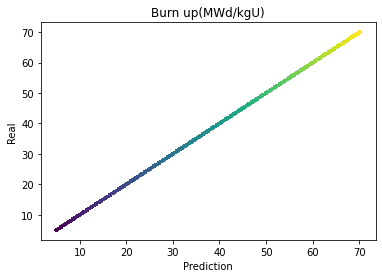

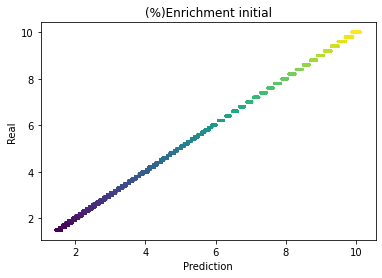

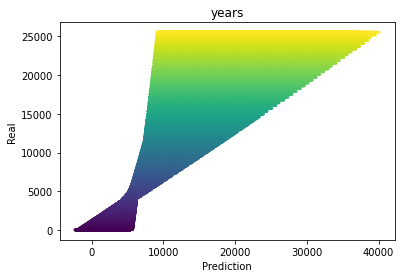

' --- '

In [11]:
"""
import matplotlib.pyplot as plt
n=pd.DataFrame(data=np.array([predict_BU,_conjunto_de_train_Y["BU"].values]).T)

n.plot(kind='scatter',x=1,y=0,s=5,vmin=0, vmax=70)

n=pd.DataFrame(data=np.array([predict_IE,_conjunto_de_train_Y["IE"].values]).T)

n.plot(kind='scatter',x=1,y=0,s=5,vmin=0, vmax=19)

n=pd.DataFrame(data=np.array([predict_CT,_conjunto_de_train_Y["CT"].values]).T)

n.plot(kind='scatter',x=1,y=0,s=5,vmin=0, vmax=5000,c=np.arange(100))
"""
import numpy as np
import matplotlib.pyplot as plt

x = predict_BU
y = _conjunto_de_train_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
#plt.legend(loc='upper left')
plt.title('Burn up(MWd/kgU)')
plt.show()


x = predict_IE
y = _conjunto_de_train_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()


x = predict_CT
y = _conjunto_de_train_Y["CT"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('years')
plt.show()
""" --- """

In [12]:
metrica_train

[['BU', 'R2', 0.9999915596917383],
 ['IE', 'R2', 0.9996077284511111],
 ['CT', 'R2', 0.7743706117865776],
 ['BU', 'MSE', 0.003017219852195917],
 ['IE', 'MSE', 0.0019156200046957868],
 ['CT', 'MSE', 11775943.680686425],
 ['BU', 'MAE', 0.03978024290982063],
 ['IE', 'MAE', 0.03325099436441903],
 ['CT', 'MAE', 1882.1662780943716],
 ['BU', 'MaxE', 0.25492613576048484],
 ['IE', 'MaxE', 0.13173375536300114],
 ['CT', 'MaxE', 16460.31954950354]]

In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_train = []
print(datetime.now())
predict_BU_t = SVR_BU.predict(_conjunto_de_test_X.values)
predict_IE_t = SVR_IE.predict(_conjunto_de_test_X.values)
predict_CT_t = SVR_CT.predict(_conjunto_de_test_X.values)
print(datetime.now())
metrica_train.append(["BU","R2",r2_score(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","R2",r2_score(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","R2",r2_score(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())
metrica_train.append(["BU","MSE",mean_squared_error(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","MSE",mean_squared_error(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","MSE",mean_squared_error(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())
metrica_train.append(["BU","MAE",median_absolute_error(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","MAE",median_absolute_error(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","MAE",median_absolute_error(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())
metrica_train.append(["BU","MaxE",max_error(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","MaxE",max_error(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","MaxE",max_error(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())

2021-10-13 11:51:40.613895
2021-10-13 11:54:45.700996
2021-10-13 11:54:45.726964
2021-10-13 11:54:45.734996
2021-10-13 11:54:45.752998
2021-10-13 11:54:45.760965


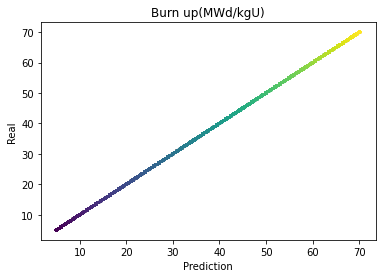

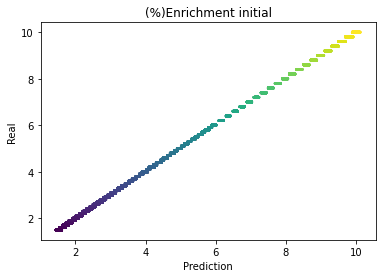

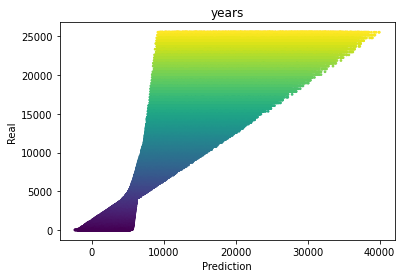

In [14]:
"""
n=pd.DataFrame(data=np.array([predict_BU_t,_conjunto_de_test_Y["BU"].values]).T)

n.plot(kind='scatter',x=1,y=0,cmap='RdYlGn',s=5)

n=pd.DataFrame(data=np.array([predict_IE_t,_conjunto_de_test_Y["IE"].values]).T)

n.plot(kind='scatter',x=1,y=0,cmap='RdYlGn',s=5)

n=pd.DataFrame(data=np.array([predict_CT_t,_conjunto_de_test_Y["CT"].values]).T)

n.plot(kind='scatter',x=1,y=0,cmap='RdYlGn',s=5)
"""

import numpy as np
import matplotlib.pyplot as plt

x = predict_BU_t
y = _conjunto_de_test_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('Burn up(MWd/kgU)')
plt.show()


x = predict_IE_t
y = _conjunto_de_test_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()

x = predict_CT_t
y = _conjunto_de_test_Y["CT"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('years')
plt.show()

In [15]:
metrica_train

[['BU', 'R2', 0.9999915783710633],
 ['IE', 'R2', 0.9996055211319718],
 ['CT', 'R2', 0.7737364585753962],
 ['BU', 'MSE', 0.003011491936131303],
 ['IE', 'MSE', 0.0019229405659966425],
 ['CT', 'MSE', 11813648.61426455],
 ['BU', 'MAE', 0.03979681214931574],
 ['IE', 'MAE', 0.033271853572247156],
 ['CT', 'MAE', 1878.704993439197],
 ['BU', 'MaxE', 0.2524201308276446],
 ['IE', 'MaxE', 0.12584148467608713],
 ['CT', 'MaxE', 16338.975938213574]]

In [16]:
joblib.dump(SVR_BU, 'SVR_BU.modelo1')
joblib.dump(SVR_IE, 'SVR_IE.modelo1')
joblib.dump(SVR_CT, 'SVR_CT.modelo1')

['SVR_CT.modelo1']

In [17]:
SVR_BU_default= SVR(max_iter = 1000)
SVR_IE_default= SVR(max_iter = 1000)
SVR_CT_default= SVR(max_iter = 1000)

In [18]:
print(datetime.now())
SVR_BU_default.fit(_conjunto_de_train_X.values,_conjunto_de_train_Y["BU"].values)
print(datetime.now())
SVR_IE_default.fit(_conjunto_de_train_X.values,_conjunto_de_train_Y["IE"].values)
print(datetime.now())
SVR_CT_default.fit(_conjunto_de_train_X.values,_conjunto_de_train_Y["CT"].values)
print(datetime.now())

2021-10-13 11:54:55.814738


c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


2021-10-13 12:09:43.601410


c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


2021-10-13 12:23:33.580915
2021-10-13 12:38:13.549526


c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [19]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_train = []
print(datetime.now())
predict_BU_i = SVR_BU_default.predict(_conjunto_de_train_X.values)
print(datetime.now())
predict_IE_i = SVR_IE_default.predict(_conjunto_de_train_X.values)
print(datetime.now())
predict_CT_i = SVR_CT_default.predict(_conjunto_de_train_X.values)
print(datetime.now())
metrica_train.append(["BU","R2",r2_score(_conjunto_de_train_Y["BU"].values, predict_BU_i)])
metrica_train.append(["IE","R2",r2_score(_conjunto_de_train_Y["IE"].values, predict_IE_i)])
metrica_train.append(["CT","R2",r2_score(_conjunto_de_train_Y["CT"].values, predict_CT_i)])
print(datetime.now())
metrica_train.append(["BU","MSE",mean_squared_error(_conjunto_de_train_Y["BU"].values, predict_BU_i)])
metrica_train.append(["IE","MSE",mean_squared_error(_conjunto_de_train_Y["IE"].values, predict_IE_i)])
metrica_train.append(["CT","MSE",mean_squared_error(_conjunto_de_train_Y["CT"].values, predict_CT_i)])
print(datetime.now())
metrica_train.append(["BU","MAE",median_absolute_error(_conjunto_de_train_Y["BU"].values, predict_BU_i)])
metrica_train.append(["IE","MAE",median_absolute_error(_conjunto_de_train_Y["IE"].values, predict_IE_i)])
metrica_train.append(["CT","MAE",median_absolute_error(_conjunto_de_train_Y["CT"].values, predict_CT_i)])
print(datetime.now())
metrica_train.append(["BU","MaxE",max_error(_conjunto_de_train_Y["BU"].values, predict_BU_i)])
metrica_train.append(["IE","MaxE",max_error(_conjunto_de_train_Y["IE"].values, predict_IE_i)])
metrica_train.append(["CT","MaxE",max_error(_conjunto_de_train_Y["CT"].values, predict_CT_i)])
print(datetime.now())

2021-10-13 12:38:13.568571
2021-10-13 12:51:45.899186
2021-10-13 13:00:30.999024
2021-10-13 13:14:03.731666
2021-10-13 13:14:03.804667
2021-10-13 13:14:03.834635
2021-10-13 13:14:03.906635
2021-10-13 13:14:03.936636


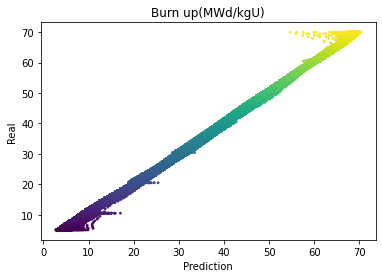

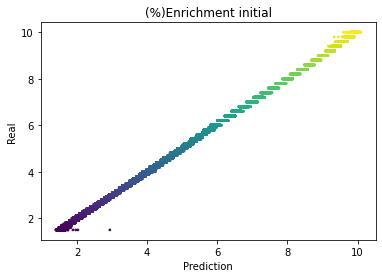

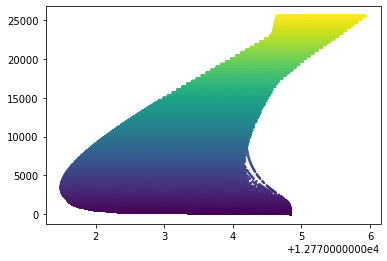

In [20]:

import numpy as np
import matplotlib.pyplot as plt

x = predict_BU_i
y = _conjunto_de_train_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('Burn up(MWd/kgU)')
plt.show()


x = predict_IE_i
y = _conjunto_de_train_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()

x = predict_CT_i

y = _conjunto_de_train_Y["CT"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.show()

In [21]:
metrica_train

[['BU', 'R2', 0.997213024823177],
 ['IE', 'R2', 0.9991660316490106],
 ['CT', 'R2', -0.2137318064900804],
 ['BU', 'MSE', 0.9962807720188058],
 ['IE', 'MSE', 0.004072603432402182],
 ['CT', 'MSE', 63346523.739032686],
 ['BU', 'MAE', 0.8322213230930018],
 ['IE', 'MAE', 0.05211664145944184],
 ['CT', 'MAE', 7300.280061044205],
 ['BU', 'MaxE', 15.365901099134533],
 ['IE', 'MaxE', 1.4358828835399762],
 ['CT', 'MaxE', 12775.361454538559]]

In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_test = []
print(datetime.now())
predict_BU_it = SVR_BU_default.predict(_conjunto_de_test_X.values)
predict_IE_it = SVR_IE_default.predict(_conjunto_de_test_X.values)
predict_CT_it = SVR_CT_default.predict(_conjunto_de_test_X.values)
print(datetime.now())
metrica_test.append(["BU","R2",r2_score(_conjunto_de_test_Y["BU"].values, predict_BU_it)])
metrica_test.append(["IE","R2",r2_score(_conjunto_de_test_Y["IE"].values, predict_IE_it)])
metrica_test.append(["CT","R2",r2_score(_conjunto_de_test_Y["CT"].values, predict_CT_it)])
print(datetime.now())
metrica_test.append(["BU","MSE",mean_squared_error(_conjunto_de_test_Y["BU"].values, predict_BU_it)])
metrica_test.append(["IE","MSE",mean_squared_error(_conjunto_de_test_Y["IE"].values, predict_IE_it)])
metrica_test.append(["CT","MSE",mean_squared_error(_conjunto_de_test_Y["CT"].values, predict_CT_it)])
print(datetime.now())
metrica_test.append(["BU","MAE",median_absolute_error(_conjunto_de_test_Y["BU"].values, predict_BU_it)])
metrica_test.append(["IE","MAE",median_absolute_error(_conjunto_de_test_Y["IE"].values, predict_IE_it)])
metrica_test.append(["CT","MAE",median_absolute_error(_conjunto_de_test_Y["CT"].values, predict_CT_it)])
print(datetime.now())
metrica_test.append(["BU","MaxE",max_error(_conjunto_de_test_Y["BU"].values, predict_BU_it)])
metrica_test.append(["IE","MaxE",max_error(_conjunto_de_test_Y["IE"].values, predict_IE_it)])
metrica_test.append(["CT","MaxE",max_error(_conjunto_de_test_Y["CT"].values, predict_CT_it)])
print(datetime.now())
metrica_test

2021-10-13 13:14:42.955693
2021-10-13 13:23:39.943714
2021-10-13 13:23:39.961715
2021-10-13 13:23:39.971719
2021-10-13 13:23:39.989714
2021-10-13 13:23:39.996715


[['BU', 'R2', 0.9972187262446368],
 ['IE', 'R2', 0.9991635948325492],
 ['CT', 'R2', -0.2138087622895355],
 ['BU', 'MSE', 0.994556225335307],
 ['IE', 'MSE', 0.004077170050045061],
 ['CT', 'MSE', 63375257.508652546],
 ['BU', 'MAE', 0.8313416010699832],
 ['IE', 'MAE', 0.05209463866185049],
 ['CT', 'MAE', 7300.24475228879],
 ['BU', 'MaxE', 7.048030634073605],
 ['IE', 'MaxE', 0.6535953638588126],
 ['CT', 'MaxE', 12775.348291903361]]

In [23]:
SVR_BU= SVR(C=1,epsilon=0.1,kernel="rbf",max_iter = 1000)
SVR_IE= SVR(C=1,epsilon=0.1,kernel="rbf",max_iter = 1000)
#SVR_CT= SVR(C=1,epsilon=0.5,kernel="linear",max_iter = 1000)

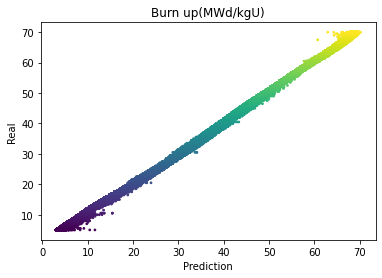

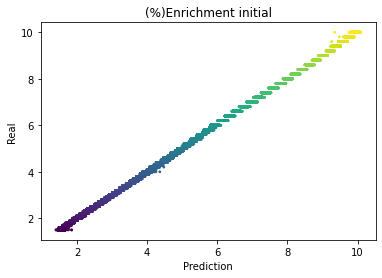

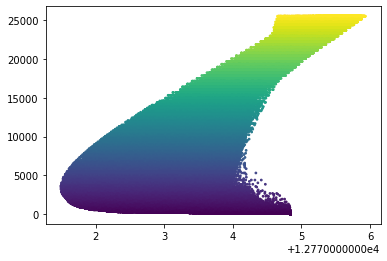

In [24]:

import numpy as np
import matplotlib.pyplot as plt

x = predict_BU_it
y = _conjunto_de_test_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('Burn up(MWd/kgU)')
plt.show()


x = predict_IE_it
y = _conjunto_de_test_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()

x = predict_CT_it

y = _conjunto_de_test_Y["CT"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.show()

In [ ]:
#modelo 2

In [25]:
_81=["He4","Pb206","Pb207","Pb208","Pb210","Bi209","Ra226","Ra228","Ac227","Th228","Th229","Th230","Th232","Pa231","U232","U233","U234","U235","U236","U238","Np237","Pu238","Pu239","Pu240","Pu241","Pu242","Pu244","Am241","Am242m","Am243","Cm242","Cm243","Cm244","Cm245","Cm246","Cm247","Cm248","Cm250","Bk249","Cf249","Cf250","Cf251","Cf252","H3","C14","Kr81","Kr85","Rb","Sr90","Zr93 w/Nb93m","Cm246","Cm247","Cm248","Cm250","Bk249","Cf249","Cf250","Cf251","Cf252","H3","C14","Kr81","Kr85","Rb","Sr90","Zr93","Nb93m","Zr95","Nb95m","Zr-other","Tc99","Tc","Ru106","Rh106","Pd107","Mo","Ru","Rh","Pd","Se79","Cd113m","Sn126","Sb126m","Sb126","Sb125","Te125m","Co","Se","Nb","Ag","Te","I129","Br","I","Cs134","Cs135","Cs137","Ba137m","Cs","Ba","Ce144","Pr144m","Pr144","Pm147","Sm146","Sm147","Sm151","Eu154","Eu155","Ho166m","Y"]
reales_81=[]
for elemento in _81:
    if elemento in fueldata.columns:
        reales_81.append(elemento)
print(reales_81)
Y=fueldata[['BU', 'CT', 'IE']]
X_CT=fueldata[reales_81]
print(len(reales_81))
#index de 5 años
from sklearn.preprocessing import StandardScaler
X_s = StandardScaler()
X_ct_s=StandardScaler()

X_CT_escalda = X_ct_s.fit_transform(X_CT.values)
#reales 81
from sklearn.model_selection import train_test_split
_conjunto_CT_de_train_X,_conjunto_CT_de_test_X,_conjunto_CT_de_train_Y,_conjunto_CT_de_test_Y=train_test_split(X_CT_escalda,Y,test_size=0.2,random_state=128)#conjunto_X_de20000,conjunto_Y_de20000
print(_conjunto_de_train_X.shape,_conjunto_de_test_X.shape)
print(_conjunto_de_train_Y.shape,_conjunto_de_test_Y.shape)
print(_conjunto_CT_de_train_X.shape,_conjunto_CT_de_test_X.shape)
print(_conjunto_CT_de_train_Y.shape,_conjunto_CT_de_test_Y.shape)


['He4', 'U232', 'U233', 'U234', 'U235', 'U236', 'U238', 'Np237', 'Pu238', 'Pu239', 'Pu240', 'Pu241', 'Pu242', 'Pu244', 'Am241', 'Am242m', 'Am243', 'Cm242', 'Cm243', 'Cm244', 'Cm245', 'Cm246', 'Cm247', 'Cm248', 'Cm250', 'Cf249', 'Cf250', 'Cf251', 'Cf252', 'H3', 'Kr85', 'Sr90', 'Cm246', 'Cm247', 'Cm248', 'Cm250', 'Cf249', 'Cf250', 'Cf251', 'Cf252', 'H3', 'Kr85', 'Sr90', 'Zr93', 'Zr95', 'Tc99', 'Ru106', 'Pd107', 'Se79', 'Sn126', 'Sb126', 'Sb125', 'I129', 'Cs134', 'Cs135', 'Cs137', 'Ce144', 'Pm147', 'Sm147', 'Sm151', 'Eu154', 'Eu155', 'Ho166m']
63
(1057117, 283) (264280, 283)
(1057117, 4) (264280, 4)
(1057117, 63) (264280, 63)
(1057117, 3) (264280, 3)


In [26]:
MODELO_SVR_BU_81=SVR(max_iter=1000)# SVR(C=1,epsilon=0.1,kernel="rbf",max_iter=1000)
MODELO_SVR_IE_81=SVR(max_iter=1000)#SVR(C=1,epsilon=0.1,kernel="rbf",max_iter=1000)
MODELO_SVR_CT_81=SVR(max_iter=1000)#SVR(C=10,epsilon=0.5,kernel="sigmoid",max_iter=1000)
print(datetime.now(),"BU")
MODELO_SVR_BU_81.fit(_conjunto_de_train_X,_conjunto_de_train_Y["BU"].values)
print(datetime.now(),"IE")
MODELO_SVR_IE_81.fit(_conjunto_de_train_X,_conjunto_de_train_Y["IE"].values)
print(datetime.now(),"CT")
#MODELO_SVR_CT_81.fit(_conjunto_de_train_X,_conjunto_de_train_Y["CT"].values)
print(datetime.now(),"fin")

2021-10-13 13:28:22.780849 BU


c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


2021-10-13 13:42:55.885748 IE
2021-10-13 13:56:34.548410 CT
2021-10-13 13:56:34.548410 fin


c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_train = []
print(datetime.now())
predict_BU = MODELO_SVR_BU_81.predict(_conjunto_de_train_X.values)
predict_IE = MODELO_SVR_IE_81.predict(_conjunto_de_train_X.values)
#predict_CT = MODELO_SVR_CT_81.predict(_conjunto_de_train_X.values)
print(datetime.now())


2021-10-13 13:56:34.561409
2021-10-13 14:18:32.267378


In [28]:
print(datetime.now())
metrica_train.append(["BU","R2",r2_score(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","R2",r2_score(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","R2",r2_score(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MSE",mean_squared_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MSE",mean_squared_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","MSE",mean_squared_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MAE",median_absolute_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MAE",median_absolute_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","MAE",median_absolute_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MaxE",max_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MaxE",max_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","MaxE",max_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train

2021-10-13 14:18:32.281405
2021-10-13 14:18:32.333377
2021-10-13 14:18:32.352411
2021-10-13 14:18:32.402378
2021-10-13 14:18:32.420377


[['BU', 'R2', 0.997213024823177],
 ['IE', 'R2', 0.9991660316490106],
 ['BU', 'MSE', 0.9962807720188058],
 ['IE', 'MSE', 0.004072603432402182],
 ['BU', 'MAE', 0.8322213230930018],
 ['IE', 'MAE', 0.05211664145944184],
 ['BU', 'MaxE', 15.365901099134533],
 ['IE', 'MaxE', 1.4358828835399762]]

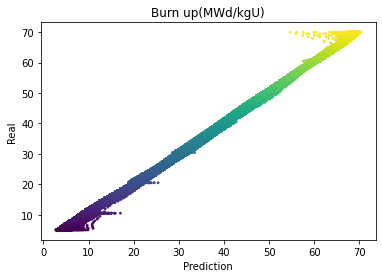

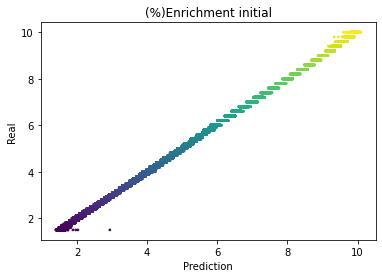

In [29]:

import numpy as np
import matplotlib.pyplot as plt

x = predict_BU
y = _conjunto_de_train_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('Burn up(MWd/kgU)')
plt.show()

#aca vamos en el 3 grafico xd
x = predict_IE
y = _conjunto_de_train_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()

#x = predict_CT

#y = _conjunto_de_train_Y["CT"].values
#t = y
#plt.scatter(x, y, c=t,s=3,cmap='viridis')

#plt.show()

In [ ]:
#joblib.dump(MODELO_SVR_BU_81, 'MODELO_SVR_BU_81.modelo1')
#joblib.dump(MODELO_SVR_IE_81, 'MODELO_SVR_IE_81.modelo1')
#joblib.dump(MODELO_SVR_CT_81, 'MODELO_SVR_CT_81.modelo1')
from joblib import dump, load
MODELO_SVR_BU_81=load('MODELO_SVR_BU_81.modelo1')
MODELO_SVR_IE_81=load('MODELO_SVR_BU_81.modelo1')
MODELO_SVR_CT_81=load('MODELO_SVR_BU_81.modelo1')

2021-10-13 14:35:24.923945
2021-10-13 14:40:56.835483


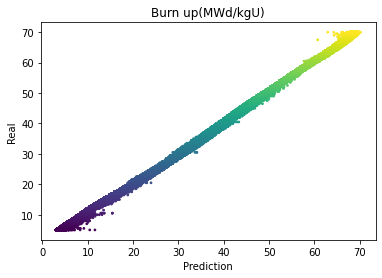

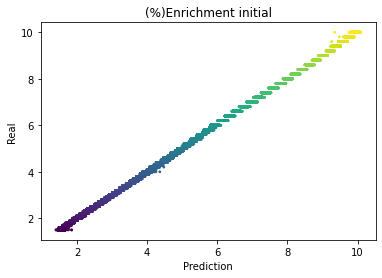

In [31]:
print(datetime.now())
predict_BU_81t = MODELO_SVR_BU_81.predict(_conjunto_de_test_X.values)
predict_IE_81t = MODELO_SVR_IE_81.predict(_conjunto_de_test_X.values)
#predict_CT_81t = MODELO_SVR_CT_81.predict(_conjunto_de_test_X.values)
print(datetime.now())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = predict_BU_81t
y = _conjunto_de_test_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('Burn up(MWd/kgU)')
plt.show()


x = predict_IE_81t
y = _conjunto_de_test_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()

#x = predict_CT_81t

#y = _conjunto_de_test_Y["CT"].values
#t = y
#plt.scatter(x, y, c=t,s=3,cmap='viridis')
#plt.show()

In [32]:
MODELO_SVR_BU_81=SVR(C=1,epsilon=0.1,kernel="rbf",max_iter=1000)
MODELO_SVR_IE_81=SVR(C=1,epsilon=0.1,kernel="rbf",max_iter=1000)
#MODELO_SVR_CT_81=SVR(C=10,epsilon=0.5,kernel="sigmoid",max_iter=1000)
print(datetime.now(),"BU")
MODELO_SVR_BU_81.fit(_conjunto_de_train_X,_conjunto_de_train_Y["BU"].values)
print(datetime.now(),"IE")
MODELO_SVR_IE_81.fit(_conjunto_de_train_X,_conjunto_de_train_Y["IE"].values)
print(datetime.now(),"CT")
#MODELO_SVR_CT_81.fit(_conjunto_de_train_X,_conjunto_de_train_Y["CT"].values)
print(datetime.now(),"fin")

2021-10-13 15:06:03.280030 BU


c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


2021-10-13 15:20:42.030089 IE
2021-10-13 15:34:26.890335 CT
2021-10-13 15:34:26.891303 fin


c:\users\juanm\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_train = []
print(datetime.now())
predict_BU = MODELO_SVR_BU_81.predict(_conjunto_de_train_X.values)
predict_IE = MODELO_SVR_IE_81.predict(_conjunto_de_train_X.values)
#predict_CT = MODELO_SVR_CT_81.predict(_conjunto_de_train_X.values)
print(datetime.now())

2021-10-13 15:34:26.909303
2021-10-13 15:56:33.789463


In [34]:
print(datetime.now())
metrica_train.append(["BU","R2",r2_score(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","R2",r2_score(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","R2",r2_score(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MSE",mean_squared_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MSE",mean_squared_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","MSE",mean_squared_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MAE",median_absolute_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MAE",median_absolute_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","MAE",median_absolute_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MaxE",max_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MaxE",max_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
#metrica_train.append(["CT","MaxE",max_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train

2021-10-13 15:56:33.800463
2021-10-13 15:56:33.849432
2021-10-13 15:56:33.870467
2021-10-13 15:56:33.917447
2021-10-13 15:56:33.937433


[['BU', 'R2', 0.997213024823177],
 ['IE', 'R2', 0.9991660316490106],
 ['BU', 'MSE', 0.9962807720188058],
 ['IE', 'MSE', 0.004072603432402182],
 ['BU', 'MAE', 0.8322213230930018],
 ['IE', 'MAE', 0.05211664145944184],
 ['BU', 'MaxE', 15.365901099134533],
 ['IE', 'MaxE', 1.4358828835399762]]

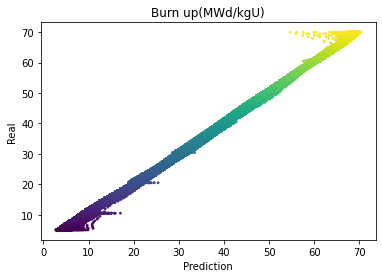

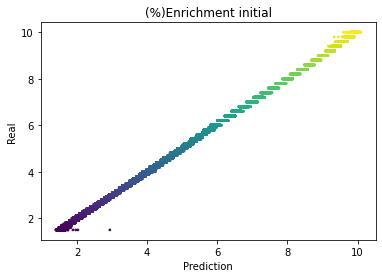

In [35]:
import numpy as np
import matplotlib.pyplot as plt

x = predict_BU
y = _conjunto_de_train_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('Burn up(MWd/kgU)')
plt.show()


x = predict_IE
y = _conjunto_de_train_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()

In [36]:
print(datetime.now())
predict_BU_81t = MODELO_SVR_BU_81.predict(_conjunto_de_test_X.values)
predict_IE_81t = MODELO_SVR_IE_81.predict(_conjunto_de_test_X.values)
#predict_CT_81t = MODELO_SVR_CT_81.predict(_conjunto_de_test_X.values)
print(datetime.now())

2021-10-13 16:34:17.516620
2021-10-13 16:39:47.515084


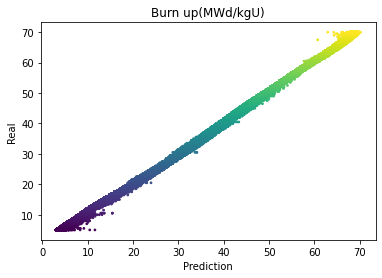

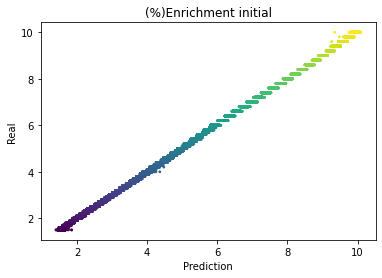

In [37]:
import numpy as np
import matplotlib.pyplot as plt

x = predict_BU_81t
y = _conjunto_de_test_Y["BU"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('Burn up(MWd/kgU)')
plt.show()


x = predict_IE_81t
y = _conjunto_de_test_Y["IE"].values
t = y
plt.scatter(x, y, c=t,s=3,cmap='viridis')
plt.xlabel("Prediction")
plt.ylabel("Real")
plt.title('(%)Enrichment initial')
plt.show()

In [ ]:
#modelo 3

In [ ]:
from sklearn.preprocessing import StandardScaler
_12 = ["Y91","Zr95","Nb95","Ru103","Ru106","Sb125","Cs134","Cs137","Eu154","Eu155","Ce141","Ce144"]
X=fueldata[_12]
X_s = StandardScaler()
X_escalada=  X_s.fit_transform(X.values)
Pandas_Xescalada = pd.DataFrame(data=X_escalada, columns = X.columns)


In [ ]:
Pandas_Xescalada

In [ ]:
SVR_BU= SVR(C=100,epsilon=0.1,kernel="linear",max_iter = 1000)
SVR_IE= SVR(C=100,epsilon=0.1,kernel="linear",max_iter = 1000)
SVR_CT= SVR(C=40,epsilon=0.5,kernel="linear",max_iter = 1000)

In [ ]:
_conjunto_de_train_X,_conjunto_de_test_X,_conjunto_de_train_Y,_conjunto_de_test_Y=train_test_split(Pandas_Xescalada,Y,test_size=0.2,random_state=128)#conjunto_X_de20000,conjunto_Y_de20000
print(_conjunto_de_train_X.shape,_conjunto_de_test_X.shape)
print(_conjunto_de_train_Y.shape,_conjunto_de_test_Y.shape)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import r2_score
from joblib import dump
fold= KFold(n_splits=5, shuffle=True, random_state=127)
scores = pd.DataFrame(data=[["SVR",0,0.0,"lineal",0.0,0.0,0.0,0.0,0.0]], columns=["MODEL","C","Epsilon","Kernel","R2_fold1","R2_fold2","R2_fold3","R2_fold4","R2_fold5"])
for train_index, test_index in fold.split(_conjunto_de_train_X,_conjunto_de_train_Y):
    X_train = _conjunto_de_train_X.iloc[train_index].values
    X_test =  _conjunto_de_train_X.iloc[test_index].values
    SVR_BU.fit(X_train,_conjunto_de_train_Y["BU"].iloc[train_index].values)
    SVR_IE.fit(X_train,_conjunto_de_train_Y["IE"].iloc[train_index].values)
    SVR_CT.fit(X_train,_conjunto_de_train_Y["CT"].iloc[train_index].values)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_train = []
print(datetime.now())
predict_BU = SVR_BU.predict(_conjunto_de_train_X.values)
predict_IE = SVR_IE.predict(_conjunto_de_train_X.values)
predict_CT = SVR_CT.predict(_conjunto_de_train_X.values)
print(datetime.now())
metrica_train.append(["BU","R2",r2_score(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","R2",r2_score(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","R2",r2_score(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MSE",mean_squared_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MSE",mean_squared_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","MSE",mean_squared_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MAE",median_absolute_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MAE",median_absolute_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","MAE",median_absolute_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())
metrica_train.append(["BU","MaxE",max_error(_conjunto_de_train_Y["BU"].values, predict_BU)])
metrica_train.append(["IE","MaxE",max_error(_conjunto_de_train_Y["IE"].values, predict_IE)])
metrica_train.append(["CT","MaxE",max_error(_conjunto_de_train_Y["CT"].values, predict_CT)])
print(datetime.now())

In [ ]:
metrica_train

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
metrica_test= []
print(datetime.now())
predict_BU_t = SVR_BU.predict(_conjunto_de_test_X.values)
predict_IE_t = SVR_IE.predict(_conjunto_de_test_X.values)
predict_CT_t = SVR_CT.predict(_conjunto_de_test_X.values)
print(datetime.now())
metrica_train.append(["BU","R2",r2_score(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","R2",r2_score(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","R2",r2_score(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())
metrica_train.append(["BU","MSE",mean_squared_error(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","MSE",mean_squared_error(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","MSE",mean_squared_error(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())
metrica_train.append(["BU","MAE",median_absolute_error(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","MAE",median_absolute_error(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","MAE",median_absolute_error(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())
metrica_train.append(["BU","MaxE",max_error(_conjunto_de_test_Y["BU"].values, predict_BU_t)])
metrica_train.append(["IE","MaxE",max_error(_conjunto_de_test_Y["IE"].values, predict_IE_t)])
metrica_train.append(["CT","MaxE",max_error(_conjunto_de_test_Y["CT"].values, predict_CT_t)])
print(datetime.now())

In [ ]:
import pandas as pd
pd.DataFrame(columns=["Y","Metrica","Valor"],data = metrica_train).to_excel("_21_atributos.xlsx")

In [ ]:
def metricas_clasificador(tn,fp,fn,tp,Tipo="entrenamiento"):
    Precision= 0.0+((tp+tn)/(tp+tn+fp+fn))*100
    Sensibilidad= 0.0+((tp)/(tp+fn))*100
    Especificidad= ((tn)/(tn+fp))*100
    VPP= ((tp)/(tp+fp))*100
    VPN= ((tn)/(tn+fn))*100
    MCC_1=np.float32(tp*tn-fp*fn)
    MCC_2 =np.float32(tp+fn)*np.float32(tp+fp)*np.float32(tn+fp)*np.float32(tn+fn)
    MCC=MCC_1/np.sqrt(MCC_2)
    print(Tipo)
    print("precision:",Precision)
    print("Sensibilidad:",Sensibilidad)
    print("Especificidad:",Especificidad)
    print("VPP:",VPP,"VPN",VPN,"MCC",MCC)
"""
matriz_prueba=matriz_prueba.ravel()
matriz_entrenamiento=matriz_entrenamiento.ravel()
metricas_clasificador(matriz_entrenamiento[0],matriz_entrenamiento[1],matriz_entrenamiento[2],matriz_entrenamiento[3],"entrenamiento")
metricas_clasificador(matriz_prueba[0],matriz_prueba[1],matriz_prueba[2],matriz_prueba[3],"test")
"""

In [ ]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
Y['fuelType']=Encoder.fit_transform(Y['fuelType']).reshape(-1,1)

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score
from joblib import dump
from sklearn.svm import SVC
from sklearn.model_selection import KFold, StratifiedKFold


print(datetime.now())
fold= KFold(n_splits=5, shuffle=True, random_state=127)
print(datetime.now())
print(datetime.now())
row_SVM={"MODEL":"SVR","C":100,"Epsilon":0.1,"Kernel":"linear","R2_fold1":0.0,"R2_fold2":0.0,"R2_fold3":0.0,"R2_fold4":0.0,"R2_fold5":0.0}
SVC =  SVC(max_iter=1000)
i=1
for train_index, test_index in fold.split(_conjunto_de_train_X,_conjunto_de_train_Y):
    X_train = _conjunto_de_train_X.iloc[train_index].values
    X_test = _conjunto_de_train_X.iloc[test_index].values
    y_train = _conjunto_de_train_Y["fuelType"].iloc[train_index].values
    y_test = _conjunto_de_train_Y["fuelType"].iloc[test_index].values
    SVC.fit(X_train, y_train)
    row_SVM["R2_fold"+str(i)] = accuracy_score(y_test, SVC.predict(X_test))
    print(datetime.now())
    i += 1

In [ ]:
from sklearn.metrics import confusion_matrix
Vector_entrenamiento=SVC.predict(_conjunto_de_train_X)
Vector_prueba=SVC.predict(_conjunto_de_test_X)
matriz_entrenamiento=confusion_matrix(_conjunto_de_train_Y["fuelType"].values, Vector_entrenamiento)
matriz_prueba=confusion_matrix(_conjunto_de_test_Y["fuelType"].values, Vector_prueba)
matriz_prueba=matriz_prueba.ravel()
matriz_entrenamiento=matriz_entrenamiento.ravel()



In [ ]:
matriz_prueba=matriz_prueba.ravel()
matriz_entrenamiento=matriz_entrenamiento.ravel()
metricas_clasificador(matriz_entrenamiento[0],matriz_entrenamiento[1],matriz_entrenamiento[2],matriz_entrenamiento[3],"entrenamiento")
metricas_clasificador(matriz_prueba[0],matriz_prueba[1],matriz_prueba[2],matriz_prueba[3],"test")